# Graphics for the Paper: A review of unsupervised learning and visual analytics techniques for non-residential building energy analysis

Oct 9, 2015

Clayton Miller

In [2]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import math
import bibtexparser
from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import *


In [3]:
%matplotlib inline

In [4]:
sns.set_style('whitegrid')
sns.set_context(context='paper')

In [5]:
litdata = pd.read_csv("ZoteroExport.csv", index_col=0)

In [6]:
litdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, I4TWCJAN to QB7SH8HI
Data columns (total 86 columns):
Item Type               125 non-null object
Publication Year        122 non-null float64
Author                  122 non-null object
Title                   125 non-null object
Publication Title       110 non-null object
ISBN                    24 non-null object
ISSN                    23 non-null object
DOI                     76 non-null object
Url                     110 non-null object
Abstract Note           61 non-null object
Date                    122 non-null object
Date Added              125 non-null object
Date Modified           125 non-null object
Access Date             41 non-null object
Pages                   95 non-null object
Num Pages               3 non-null float64
Issue                   38 non-null object
Volume                  62 non-null object
Number Of Volumes       2 non-null object
Journal Abbreviation    57 non-null object
Short Title        

Test Graphic

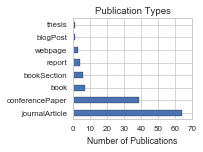

In [7]:
fig = plt.figure()
litdata["Item Type"].value_counts().plot(kind='barh', figsize=(3,2))
plt.subplots_adjust(left=0.35, bottom=0.2)
plt.title("Publication Types")
plt.xlabel("Number of Publications")
fig.savefig("PubType.pdf")

## Organize Tags

In [8]:
litdata["Review"] = litdata["Manual Tags"].str.contains("Review")

In [9]:
SectorTags = ["BuildingEnergyAnalysis", "ElectricalEngineering", "ComputerScience", "BuildingSimulation"]

ApplicationTags_General = ["AnomalyDetection", "Operations", "PortfolioAnalysis", "SmartMeter" ]

ApplicationTags_Specific = ["Component", "Subsystem", "WholeBuilding", 
                            "Controls", "OccupancyDetection", "RetrofitAnalysis", "EnergyManagment",
                            "Characterization", "Classifying", "Targeting",
                            "LoadProfiling", "CustomerClassification", "Disaggregation"]

TechniqueTags_General = ["Clustering", "NoveltyDetection", "MotifandDiscordDetection", 
                         "RuleExtraction", "VisualAnalytics"]

TechniqueTags_Specific = ["AntColony", "Bayesian", "ClassificationandRegressionTree", "DataAssociationRules", 
                          "EmpiricalModeDecomposition", "FourierTransform", "GeneralizedAdditiveModels", 
                          "GeneralizedExtremeStudentizedDeviate", "MarkovModel", "Hierarchical",
                          "IncrementalSummarizationandPatternChar", "K-Means", 
                          "LinearDescriminantAnalysis", "DirichletProcessGaussianMixtureModels", "FP-Stream",
                          "FuzzyClustering", "MaximumLikelihood", "NearestNeighbor", "PCA", "SAX", 
                          "SelfOrganizingMaps", "SupportVectorMachines", "Wavelets", "MultipleTechniques",
                          "EnergyInformationSystem", "PatternAnalysis"]

taglistsdict = {"Sector":SectorTags, "AppTagGeneral":ApplicationTags_General, 
                "AppTagSpecific":ApplicationTags_Specific, "TechniqueTagGen":TechniqueTags_General, 
                "TechniqueTagSpec":TechniqueTags_Specific}

In [10]:
litdata["Manual Tags"].head()

﻿"Key"
I4TWCJAN    NaN
HA9ASFGC    NaN
TTCWW37J    NaN
2DS77FFR    NaN
NC6C9WWK    NaN
Name: Manual Tags, dtype: object

In [11]:
def assigntags(taglist, taglistname, litdata):
    tags = []
    for tagname in taglist:
        df = pd.DataFrame(litdata[litdata["Manual Tags"].str.contains(tagname) == True].index)
        df[taglistname] = tagname
        tags.append(df)
    total = pd.concat(tags)
    total.columns = ["Key", taglistname]
    total.index = total.Key
    total = total.drop(["Key"], axis=1)
    return total      

In [12]:
assigntags(SectorTags, "Sector", litdata).head()

,Sector
Key,
PKUJ8VGA,BuildingEnergyAnalysis
NR2GAKW3,BuildingEnergyAnalysis
K96TDHIB,BuildingEnergyAnalysis
GK4QWTI4,BuildingEnergyAnalysis
SKGSZE2V,BuildingEnergyAnalysis


In [13]:
tags_df = pd.DataFrame(index=litdata[litdata.Review == False].index)
for taglist in taglistsdict:
    totaltags = assigntags(taglistsdict[taglist], taglist, litdata[litdata.Review == False])
    tags_df = pd.merge(tags_df, totaltags, right_index=True, left_index=True, how='outer')

In [14]:
tags_df[tags_df.TechniqueTagSpec.isnull()]

,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific
8RHTGAXS,NaN,NaN,NaN,NaN,NaN


In [15]:
litdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, I4TWCJAN to QB7SH8HI
Data columns (total 87 columns):
Item Type               125 non-null object
Publication Year        122 non-null float64
Author                  122 non-null object
Title                   125 non-null object
Publication Title       110 non-null object
ISBN                    24 non-null object
ISSN                    23 non-null object
DOI                     76 non-null object
Url                     110 non-null object
Abstract Note           61 non-null object
Date                    122 non-null object
Date Added              125 non-null object
Date Modified           125 non-null object
Access Date             41 non-null object
Pages                   95 non-null object
Num Pages               3 non-null float64
Issue                   38 non-null object
Volume                  62 non-null object
Number Of Volumes       2 non-null object
Journal Abbreviation    57 non-null object
Short Title        

In [16]:
mergeddata = pd.merge(litdata[["Title", "Publication Title", "Conference Name","Author", "Item Type", "Publication Year"]], tags_df, right_index=True, left_index=True)

In [17]:
mergeddata.to_csv("tagstest.csv")

In [18]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 24M5DC6E to ZX4JF3W4
Data columns (total 11 columns):
Title                100 non-null object
Publication Title    95 non-null object
Conference Name      37 non-null object
Author               100 non-null object
Item Type            100 non-null object
Publication Year     100 non-null float64
Sector               99 non-null object
AppTagGeneral        99 non-null object
TechniqueTagGen      99 non-null object
TechniqueTagSpec     99 non-null object
AppTagSpecific       99 non-null object
dtypes: float64(1), object(10)
memory usage: 9.4+ KB


Get the .bibtex notations and combine them as well

In [19]:
with open('unsupervisedreview.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)
bibtex = pd.DataFrame(bib_database.entries)

In [20]:
bibtex.title = bibtex.title.str.replace("{","")
bibtex.title = bibtex.title.str.replace("}","")

In [21]:
bibtex.sort(columns="title").reset_index().head()

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,ENTRYTYPE,ID,abstract,address,author,booktitle,copyright,doi,edition,...,pages,publisher,school,series,shorttitle,title,type,urldate,volume,year
0,30,article,de_silva_data_2011,NaN,NaN,"De Silva, Daswin and Yu, Xinghuo and Alahakoon...",NaN,NaN,10.1109/TII.2011.2158844,NaN,...,399--407,NaN,NaN,NaN,NaN,A Data Mining Framework for Electricity Consum...,NaN,NaN,7,2011
1,80,incollection,mansur_learning_2015,NaN,Cham,"Mansur, Vitor and Carreira, Paulo and Arsenio,...",Internet of {Things}. {User}-{Centric} {IoT},NaN,NaN,NaN,...,9--15,Springer International Publishing,NaN,NaN,NaN,A Learning Approach for Energy Efficiency Opti...,NaN,NaN,150,2015
2,107,inproceedings,shao_temporal_2013,NaN,"Bellevue, WA, USA","Shao, Huijuan and Marwah, Manish and Ramakrish...",Proceedings of the {Twenty}-{Seventh} {AAAI} {...,NaN,NaN,NaN,...,2250,NaN,NaN,NaN,NaN,A Temporal Motif Mining Approach to Unsupervis...,NaN,NaN,250,2013
3,13,article,adamopoulou_context-aware_2015,In this paper a building occupancy prediction ...,NaN,"Adamopoulou, Anna A. and Tryferidis, Athanasio...",NaN,NaN,10.1016/j.enbuild.2015.10.003,NaN,...,NaN,NaN,NaN,NaN,NaN,A context-aware method for building occupancy ...,NaN,2015-10-13,NaN,2015
4,40,article,fan_framework_2015,Building Automation System (BAS) plays an impo...,NaN,"Fan, Cheng and Xiao, Fu and Yan, Chengchu",NaN,NaN,10.1016/j.autcon.2014.12.006,NaN,...,81--90,NaN,NaN,NaN,NaN,A framework for knowledge discovery in massive...,NaN,2015-10-01,50,2015


In [22]:
mergeddata.sort(columns="Title").reset_index().head(2)

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,Title,Publication Title,Conference Name,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific
0,EX6GFAAK,A Data Mining Framework for Electricity Consum...,IEEE Transactions on Industrial Informatics,NaN,"De Silva, Daswin; Yu, Xinghuo; Alahakoon, Damm...",journalArticle,2011.0,ElectricalEngineering,SmartMeter,MotifandDiscordDetection,IncrementalSummarizationandPatternChar,LoadProfiling
1,JTEUKS2H,A Learning Approach for Energy Efficiency Opti...,Internet of Things. User-Centric IoT,NaN,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",bookSection,2015.0,ComputerScience,Operations,Clustering,K-Means,OccupancyDetection


In [23]:
mergeddata = pd.merge(mergeddata.sort(columns="Title"), bibtex[['title','ID']].sort(columns="title"), left_on='Title', right_on='title', how='left')

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/Clayton/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:703: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [24]:
mergeddata.ix[89]

Title                Towards an understanding of campus-scale power...
Publication Title    Proceedings of the Third ACM Workshop on Embed...
Conference Name      ACM Workshop on Embedded Sensing Systems for E...
Author               Bellala, Gowtham; Marwah, Manish; Arlitt, Mart...
Item Type                                              conferencePaper
Publication Year                                                  2011
Sector                                                 ComputerScience
AppTagGeneral                                        PortfolioAnalysis
TechniqueTagGen                                       NoveltyDetection
TechniqueTagSpec                                           MarkovModel
AppTagSpecific                                               Targeting
title                Towards an understanding of campus-scale power...
ID                                                bellala_towards_2011
Name: 89, dtype: object

# Create an overview visualization of the domains and subdomains using a hierarchical pie chart

In [25]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
Title                100 non-null object
Publication Title    95 non-null object
Conference Name      37 non-null object
Author               100 non-null object
Item Type            100 non-null object
Publication Year     100 non-null float64
Sector               99 non-null object
AppTagGeneral        99 non-null object
TechniqueTagGen      99 non-null object
TechniqueTagSpec     99 non-null object
AppTagSpecific       99 non-null object
title                96 non-null object
ID                   96 non-null object
dtypes: float64(1), object(12)
memory usage: 10.9+ KB


In [26]:
Applications = mergeddata[['AppTagGeneral','AppTagSpecific']]

In [27]:
Applications.index = Applications.AppTagSpecific

In [28]:
Applications.head()

,AppTagGeneral,AppTagSpecific
AppTagSpecific,,
LoadProfiling,SmartMeter,LoadProfiling
OccupancyDetection,Operations,OccupancyDetection
Disaggregation,SmartMeter,Disaggregation
OccupancyDetection,Operations,OccupancyDetection
WholeBuilding,AnomalyDetection,WholeBuilding


In [29]:
ApplicationCounts = pd.DataFrame(Applications.AppTagSpecific.value_counts())
ApplicationCounts.columns = ["A"]#.reset_index()
ApplicationCounts = ApplicationCounts.join(Applications).drop_duplicates()
ApplicationCounts = ApplicationCounts.sort(columns='A').sort(columns='AppTagGeneral').reset_index(drop=True)

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [30]:
ApplicationCounts

,A,AppTagGeneral,AppTagSpecific
0,4,AnomalyDetection,Component
1,8,AnomalyDetection,Subsystem
2,11,AnomalyDetection,WholeBuilding
3,7,Operations,EnergyManagment
4,7,Operations,OccupancyDetection
5,11,Operations,Controls
6,5,PortfolioAnalysis,Classifying
7,7,PortfolioAnalysis,Targeting
8,13,PortfolioAnalysis,Characterization
9,2,SmartMeter,Disaggregation


In [31]:
ApplicationCounts['A_count'] = ApplicationCounts.A.astype('string')

In [32]:
ApplicationCounts

,A,AppTagGeneral,AppTagSpecific,A_count
0,4,AnomalyDetection,Component,4
1,8,AnomalyDetection,Subsystem,8
2,11,AnomalyDetection,WholeBuilding,11
3,7,Operations,EnergyManagment,7
4,7,Operations,OccupancyDetection,7
5,11,Operations,Controls,11
6,5,PortfolioAnalysis,Classifying,5
7,7,PortfolioAnalysis,Targeting,7
8,13,PortfolioAnalysis,Characterization,13
9,2,SmartMeter,Disaggregation,2


In [33]:
ApplicationCounts = ApplicationCounts.replace(['WholeBuilding','EnergyManagment','RetrofitAnalysis',
                                               'OccupancyDetection','LoadProfiling','CustomerClassification'],
                                              ['Whole Building','Energy Management','Retrofit Analysis',
                                               'Occupancy\nDetection', 'Load\nProfiling', 'Customer\nClassification'])
ApplicationCounts = ApplicationCounts.replace(['AnomalyDetection','PortfolioAnalysis','SmartMeter'],
                                              ['Anomaly\nDetection','Portfolio\nAnalysis','Smart\nMeter'])

In [34]:
ApplicationCounts

,A,AppTagGeneral,AppTagSpecific,A_count
0,4,Anomaly\nDetection,Component,4
1,8,Anomaly\nDetection,Subsystem,8
2,11,Anomaly\nDetection,Whole Building,11
3,7,Operations,Energy Management,7
4,7,Operations,Occupancy\nDetection,7
5,11,Operations,Controls,11
6,5,Portfolio\nAnalysis,Classifying,5
7,7,Portfolio\nAnalysis,Targeting,7
8,13,Portfolio\nAnalysis,Characterization,13
9,2,Smart\nMeter,Disaggregation,2


In [35]:
ApplicationCounts['AppTagSpecNew'] = ApplicationCounts.AppTagSpecific + " - " + ApplicationCounts.A_count

In [36]:
ApplicationCounts

,A,AppTagGeneral,AppTagSpecific,A_count,AppTagSpecNew
0,4,Anomaly\nDetection,Component,4,Component - 4
1,8,Anomaly\nDetection,Subsystem,8,Subsystem - 8
2,11,Anomaly\nDetection,Whole Building,11,Whole Building - 11
3,7,Operations,Energy Management,7,Energy Management - 7
4,7,Operations,Occupancy\nDetection,7,Occupancy\nDetection - 7
5,11,Operations,Controls,11,Controls - 11
6,5,Portfolio\nAnalysis,Classifying,5,Classifying - 5
7,7,Portfolio\nAnalysis,Targeting,7,Targeting - 7
8,13,Portfolio\nAnalysis,Characterization,13,Characterization - 13
9,2,Smart\nMeter,Disaggregation,2,Disaggregation - 2


In [37]:
ApplicationCounts = ApplicationCounts.drop(['A_count','AppTagSpecific'], axis=1)
ApplicationCounts = ApplicationCounts[['AppTagGeneral', 'AppTagSpecNew', 'A']]


In [38]:
goodcolors1 = [u'#006d2c',u'#0868ac',u'#810f7c',u'#b30000']
goodcolors2 = [u'#2ca25f',u'#66c2a4',u'#b2e2e2',
              u'#43a2ca',u'#7bccc4',u'#bae4bc',
              u'#8856a7',u'#8c96c6',u'#b3cde3',
              u'#e34a33',u'#fc8d59',u'#fdcc8a'] #u'#f0f9e8',

In [39]:
ApplicationCounts

,AppTagGeneral,AppTagSpecNew,A
0,Anomaly\nDetection,Component - 4,4
1,Anomaly\nDetection,Subsystem - 8,8
2,Anomaly\nDetection,Whole Building - 11,11
3,Operations,Energy Management - 7,7
4,Operations,Occupancy\nDetection - 7,7
5,Operations,Controls - 11,11
6,Portfolio\nAnalysis,Classifying - 5,5
7,Portfolio\nAnalysis,Targeting - 7,7
8,Portfolio\nAnalysis,Characterization - 13,13
9,Smart\nMeter,Disaggregation - 2,2


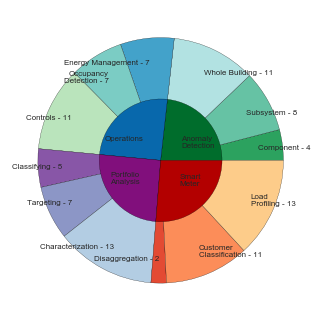

In [40]:
# Do the summing to get the values for each layer
def nested_pie(df):

    cols = df.columns.tolist()
    outd = {}
    gb = df.groupby(cols[0], sort=False).sum()
    outd[0] = {'names':gb.index.values, 'values':gb.values}
    for lev in range(1,2):
        gb = df.groupby(cols[:(lev+1)], sort=False).sum()
        outd[lev] = {'names':gb.index.levels[lev][gb.index.labels[lev]].tolist(),
                     'values':gb.values}
    return outd

outd = nested_pie(ApplicationCounts)
diff = 1/2

fig = plt.figure(figsize=(5.5,5.5))

# This first pie chart fill the plot, it's the lowest level
plt.pie(outd[1]['values'], labels=outd[1]['names'], labeldistance=0.8,
        colors=goodcolors2)
ax = plt.gca()
# For each successive plot, change the max radius so that they overlay
for i in np.arange(0,-1,-1):
    ax.pie(outd[i]['values'], labels=outd[i]['names'], 
           radius=np.float(i+1)/2.0, labeldistance=0.45,
           colors=goodcolors1)
ax.set_aspect('equal')

fig.savefig("PieChart.pdf")

In [41]:
outd

{0: {'names': array(['Anomaly\nDetection', 'Operations', 'Portfolio\nAnalysis',
         'Smart\nMeter'], dtype=object), 'values': array([[23],
         [25],
         [25],
         [26]])},
 1: {'names': ['Component - 4',
   'Subsystem - 8',
   'Whole Building - 11',
   'Energy Management - 7',
   'Occupancy\nDetection - 7',
   'Controls - 11',
   'Classifying - 5',
   'Targeting - 7',
   'Characterization - 13',
   'Disaggregation - 2',
   'Customer\nClassification - 11',
   'Load\nProfiling - 13'],
  'values': array([[ 4],
         [ 8],
         [11],
         [ 7],
         [ 7],
         [11],
         [ 5],
         [ 7],
         [13],
         [ 2],
         [11],
         [13]])}}

## Smart Meter Papers

In [42]:
def createcatlist(df, listname):
    df = df[df.AppTagGeneral == listname].drop(['Publication Title','AppTagGeneral','Item Type','title', 'Conference Name'],axis=1)
    df = df.replace(['BuildingEnergyAnalysis','ElectricalEngineering','ComputerScience','BuildingSimulation'],
                    ['Building Energy','Elec. Engineering','Computer Science','Building Sim.'])
    
    df = df.replace(["Clustering", "NoveltyDetection", "MotifandDiscordDetection","RuleExtraction", "VisualAnalytics",
                    "Characterization", "Disaggregation"],
                    ["Clustering", "Novelty Detection", "Motif Detection","Rule Extraction", "Visual Analytics",
                    "Characterization", "Disaggregation"])
    
    df = df.replace(['WholeBuilding','EnergyManagment','RetrofitAnalysis',
                    'OccupancyDetection','LoadProfiling','CustomerClassification'],
                    ['Whole Building','Energy Management','Retrofit Analysis',
                    'Occupancy Detection', 'Load Profiling', 'Customer Class.'])
    
    df = df.replace(["AntColony", "Bayesian", "ClassificationandRegressionTree", "DataAssociationRules", 
                    "EmpiricalModeDecomposition", "FourierTransform", "GeneralizedAdditiveModels", 
                      "GeneralizedExtremeStudentizedDeviate", "MarkovModel", "Hierarchical",
                      "IncrementalSummarizationandPatternChar", "K-Means", 
                      "LinearDescriminantAnalysis", "DirichletProcessGaussianMixtureModels", "FP-Stream",
                      "FuzzyClustering", "MaximumLikelihood", "NearestNeighbor", "PCA", "SAX", 
                      "SelfOrganizingMaps", "SupportVectorMachines", "Wavelets", "MultipleTechniques",
                      "EnergyInformationSystem", "PatternAnalysis"],
                    ["Ant Colony", "Bayesian", "CART", "DAR", 
                    "EMC", "Fourier", "GAM",
                      "GESD", "Markov", "Hierarchical",
                      "ISPC", "K-Means", 
                      "LDA", "DPGMM", "FP-Stream",
                      "Fuzzy Clust.", "ML", "Nearest Neighbor", "PCA", "SAX", 
                      "SOM", "SVM", "Wavelets", "Multiple",
                      "EIS", "Patterns"])
    df["Reference"] = "\cite{"+df["ID"]+"}"
    df = df.drop(["ID"], axis=1)
    #df["Ref"] = np.nan
    df.columns = ["Title","Author","Pub. Year","Sector","Type of Analysis","Technique","Sub-Application","Reference"]
    df = df.sort(columns='Pub. Year', ascending=False)
    df_forpaper = df[["Pub. Year","Sub-Application","Sector","Type of Analysis","Technique","Reference"]] #"Title","Author",
    df_forpaper = df_forpaper.reset_index(drop=True)
    df_forpaper = df_forpaper.sort(columns='Pub. Year', ascending=False)
    
    return df_forpaper, df

In [43]:
smartmeterlist, raw = createcatlist(mergeddata, "SmartMeter")

latexstring = smartmeterlist.to_latex(longtable=True, index=False)
latexstring = latexstring.replace("\\textbackslash","\\")
latexstring = latexstring.replace("\\{","{")
latexstring = latexstring.replace("\\}","}")
latexstring = latexstring.replace("\\_","_")

print latexstring


\begin{longtable}{rlllll}
\toprule
 Pub. Year &  Sub-Application &             Sector &   Type of Analysis &   Technique &                           Reference \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    2016.0 &  Customer Class. &    Building Energy &         Clustering &     K-Means &        \cite{jang_variability_2016} \\
    2015.0 &   Load Profiling &   Computer Science &         Clustering &     K-Means &     \cite{shahzadeh_improving_2015} \\
    2015.0 &  Customer Class. &   Computer Science &   Visual Analytics &    Patterns &               \cite{liu_smas:_2015} \\
    2015.0 &   Load Profiling &  Elec. Engineering &         Clustering &         PCA &        \cite{pan_kernel-based_2015} \\
    2015.0 &   Load Profiling &  Elec. Engineering &         Clustering &    Multiple &  \cite{panapakidis_evaluation_2015} \\
    2015.0 &  Customer Class. &   Computer Science &  Novelty Detection &      Marko

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [44]:
raw

,Title,Author,Pub. Year,Sector,Type of Analysis,Technique,Sub-Application,Reference
94,Variability of electricity load patterns and i...,"Jang, Dongsik; Eom, Jiyong; Jae Park, Min; Jeu...",2016.0,Building Energy,Clustering,K-Means,Customer Class.,\cite{jang_variability_2016}
57,Improving load forecast accuracy by clustering...,"Shahzadeh, Abbas; Khosravi, Abbas; Nahavandi, ...",2015.0,Computer Science,Clustering,K-Means,Load Profiling,\cite{shahzadeh_improving_2015}
75,SMAS: A smart meter data analytics system,"Liu, Xiufeng; Golab, L.; Ilyas, I.F.",2015.0,Computer Science,Visual Analytics,Patterns,Customer Class.,\cite{liu_smas:_2015}
58,Kernel-based non-parametric clustering for loa...,"Pan, Erte; Li, Husheng; Song, Lingyang; Han, Zhu",2015.0,Elec. Engineering,Clustering,PCA,Load Profiling,\cite{pan_kernel-based_2015}
45,Evaluation of the performance of clustering al...,"Panapakidis, Ioannis; Alexiadis, Minas; Papagi...",2015.0,Elec. Engineering,Clustering,Multiple,Load Profiling,\cite{panapakidis_evaluation_2015}
9,A novelty detection approach to identify the o...,"Fagiani, Marco; Squartini, Stefano; Severini, ...",2015.0,Computer Science,Novelty Detection,Markov,Customer Class.,\cite{fagiani_novelty_2015}
68,PowerSAX: Fast motif matching in distributed p...,"Reinhardt, Andreas; Koessler, Sebastian",2014.0,Elec. Engineering,Motif Detection,SAX,Disaggregation,\cite{reinhardt_powersax:_2014}
27,Clustering time-series energy data from smart ...,"Lavin, Alexander; Klabjan, Diego",2014.0,Building Energy,Clustering,K-Means,Load Profiling,\cite{lavin_clustering_2014}
37,Divide and Conquer K-Means Clustering of Deman...,"Green, R.; Staffell, I.; Vasilakos, N.",2014.0,Elec. Engineering,Clustering,K-Means,Load Profiling,\cite{green_divide_2014}
79,SmartD: Smart Meter Data Analytics Dashboard,"Jarrah Nezhad, Aylin; Wijaya, Tri Kurniawan; V...",2014.0,Computer Science,Visual Analytics,Patterns,Load Profiling,\cite{jarrah_nezhad_smartd:_2014}


## Portofolio Analysis

In [45]:
portfolioanalysis, raw = createcatlist(mergeddata, "PortfolioAnalysis")

latexstring = portfolioanalysis.to_latex(longtable=True, index=False)
latexstring = latexstring.replace("\\textbackslash","\\")
latexstring = latexstring.replace("\\{","{")
latexstring = latexstring.replace("\\}","}")
latexstring = latexstring.replace("\\_","_")

print latexstring

\begin{longtable}{rlllll}
\toprule
 Pub. Year &   Sub-Application &             Sector &   Type of Analysis &     Technique &                            Reference \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    2016.0 &         Targeting &    Building Energy &         Clustering &  Fuzzy Clust. &       \cite{schlueter_analysis_2016} \\
    2016.0 &         Targeting &    Building Energy &         Clustering &      Multiple &        \cite{geyer_application_2016} \\
    2015.0 &  Characterization &  Elec. Engineering &   Visual Analytics &           EIS &       \cite{diong_establishing_2015} \\
    2015.0 &  Characterization &    Building Energy &   Visual Analytics &           EIS &    \cite{yarbrough_visualizing_2015} \\
    2015.0 &  Characterization &    Building Energy &    Motif Detection &           SAX &         \cite{miller_automated_2015} \\
    2015.0 &       Classifying &    Building Energy &       

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [46]:
raw

,Title,Author,Pub. Year,Sector,Type of Analysis,Technique,Sub-Application,Reference
12,Analysis of Georeferenced Building Data for th...,"Schlueter, A.; Geyer, P.; Cisar, S.",2016.0,Building Energy,Clustering,Fuzzy Clust.,Targeting,\cite{schlueter_analysis_2016}
18,Application of clustering for the development ...,"Geyer, Philipp; Schlüter, Arno; Cisar, Sasha",2016.0,Building Energy,Clustering,Multiple,Targeting,\cite{geyer_application_2016}
41,Establishing the foundation for energy managem...,"Diong, B.; Zheng, G.; Ginn, M.",2015.0,Elec. Engineering,Visual Analytics,EIS,Characterization,\cite{diong_establishing_2015}
96,Visualizing building energy demand for buildin...,"Yarbrough, I.; Sun, Q.; Reeves, D. C.; Hackman...",2015.0,Building Energy,Visual Analytics,EIS,Characterization,\cite{yarbrough_visualizing_2015}
20,Automated daily pattern filtering of measured ...,"Miller, Clayton; Nagy, Zoltán; Schlueter, Arno",2015.0,Building Energy,Motif Detection,SAX,Characterization,\cite{miller_automated_2015}
55,Identifying energy consumption patterns in the...,"Pieri, Stella Panayiota; IoannisTzouvadakis; S...",2015.0,Building Energy,Clustering,Multiple,Classifying,NaN
53,Forensically discovering simulation feedback k...,"Miller, Clayton; Schlueter, Arno",2015.0,Building Sim.,Clustering,Multiple,Characterization,\cite{miller_forensically_2015}
78,Site-Level Energy Monitoring and Analysis usin...,"Georgescu, M; Mezic, I",2014.0,Building Sim.,Visual Analytics,Patterns,Characterization,\cite{georgescu_site-level_2014}
99,"e2-Diagnoser: A System for Monitoring, Forecas...","Ploennigs, Joern; Chen, Bei; Palmes, Paulito; ...",2014.0,Elec. Engineering,Novelty Detection,GAM,Classifying,\cite{ploennigs_e2-diagnoser:_2014}
26,Cluster analysis of simulated energy use for L...,"Heidarinejad, Mohammad; Dahlhausen, Matthew; M...",2014.0,Building Energy,Clustering,K-Means,Classifying,\cite{heidarinejad_cluster_2014}


## Operations

In [47]:
operations, raw = createcatlist(mergeddata, "Operations")

latexstring = operations.to_latex(longtable=True, index=False)
latexstring = latexstring.replace("\\textbackslash","\\")
latexstring = latexstring.replace("\\{","{")
latexstring = latexstring.replace("\\}","}")
latexstring = latexstring.replace("\\_","_")

print latexstring

\begin{longtable}{rlllll}
\toprule
 Pub. Year &      Sub-Application &             Sector &  Type of Analysis & Technique &                                   Reference \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    2016.0 &  Occupancy Detection &    Building Energy &   Rule Extraction &  Wavelets &                 \cite{ahn_correlation_2016} \\
    2015.0 &  Occupancy Detection &   Computer Science &        Clustering &   K-Means &                 \cite{mansur_learning_2015} \\
    2015.0 &  Occupancy Detection &    Building Energy &   Rule Extraction &    Markov &       \cite{adamopoulou_context-aware_2015} \\
    2015.0 &    Energy Management &    Building Energy &   Rule Extraction &       DAR &                    \cite{fan_temporal_2015} \\
    2015.0 &    Energy Management &    Building Energy &  Visual Analytics &       EIS &                    \cite{gayeski_data_2015} \\
    2015.0 &  Occupancy Detect

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [48]:
raw

,Title,Author,Pub. Year,Sector,Type of Analysis,Technique,Sub-Application,Reference
30,Correlation between occupants and energy consu...,"Ahn, Ki-Uhn; Park, Cheol-Soo",2016.0,Building Energy,Rule Extraction,Wavelets,Occupancy Detection,\cite{ahn_correlation_2016}
1,A Learning Approach for Energy Efficiency Opti...,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",2015.0,Computer Science,Clustering,K-Means,Occupancy Detection,\cite{mansur_learning_2015}
3,A context-aware method for building occupancy ...,"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",2015.0,Building Energy,Rule Extraction,Markov,Occupancy Detection,\cite{adamopoulou_context-aware_2015}
86,Temporal Knowledge Discovery in Big BAS Data f...,"Fan, Cheng; Xiao, Fu; Madsen, Henrik; Wang, Dan",2015.0,Building Energy,Rule Extraction,DAR,Energy Management,\cite{fan_temporal_2015}
32,Data and Interfaces for Advanced Building Oper...,"Gayeski, Nicholas; Kleindienst, Sian; Gagne, J...",2015.0,Building Energy,Visual Analytics,EIS,Energy Management,\cite{gayeski_data_2015}
64,Occupancy schedules learning process through a...,"D’Oca, Simona; Hong, Tianzhen",2015.0,Building Energy,Rule Extraction,Multiple,Occupancy Detection,\cite{doca_occupancy_2015}
52,Finding the Different Patterns in Buildings Da...,"Habib, U.; Zucker, G.",2015.0,Elec. Engineering,Motif Detection,SAX,Controls,\cite{habib_finding_2015}
35,Data mining in building automation system for ...,"Xiao, Fu; Fan, Cheng",2014.0,Building Energy,Rule Extraction,DAR,Energy Management,\cite{xiao_data_2014}
59,Learning decision rules for energy efficient b...,"Domahidi, Alexander; Ullmann, Fabian; Morari, ...",2014.0,Elec. Engineering,Rule Extraction,SVM,Controls,\cite{domahidi_learning_2014}
88,Towards Automatic Spatial Verification of Sens...,"Hong, Dezhi; Ortiz, Jorge; Whitehouse, Kamin; ...",2013.0,Computer Science,Clustering,EMC,Controls,\cite{hong_towards_2013}


# Anomaly Detection Papers

We need a table of the Anomaly Detection papers

In [49]:
mergeddata = mergeddata.reset_index(drop=True)

In [50]:
mergeddata.head()

,Title,Publication Title,Conference Name,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific,title,ID
0,A Data Mining Framework for Electricity Consum...,IEEE Transactions on Industrial Informatics,NaN,"De Silva, Daswin; Yu, Xinghuo; Alahakoon, Damm...",journalArticle,2011.0,ElectricalEngineering,SmartMeter,MotifandDiscordDetection,IncrementalSummarizationandPatternChar,LoadProfiling,A Data Mining Framework for Electricity Consum...,de_silva_data_2011
1,A Learning Approach for Energy Efficiency Opti...,Internet of Things. User-Centric IoT,NaN,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",bookSection,2015.0,ComputerScience,Operations,Clustering,K-Means,OccupancyDetection,A Learning Approach for Energy Efficiency Opti...,mansur_learning_2015
2,A Temporal Motif Mining Approach to Unsupervis...,Proceedings of the Twenty-Seventh AAAI Confere...,Conference on Artificial Intelligence (AAAI),"Shao, Huijuan; Marwah, Manish; Ramakrishnan, N...",conferencePaper,2013.0,ComputerScience,SmartMeter,MotifandDiscordDetection,DirichletProcessGaussianMixtureModels,Disaggregation,A Temporal Motif Mining Approach to Unsupervis...,shao_temporal_2013
3,A context-aware method for building occupancy ...,Energy and Buildings,NaN,"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",journalArticle,2015.0,BuildingEnergyAnalysis,Operations,RuleExtraction,MarkovModel,OccupancyDetection,A context-aware method for building occupancy ...,adamopoulou_context-aware_2015
4,A framework for knowledge discovery in massive...,Automation in Construction,NaN,"Fan, Cheng; Xiao, Fu; Yan, Chengchu",journalArticle,2015.0,BuildingEnergyAnalysis,AnomalyDetection,NoveltyDetection,DataAssociationRules,WholeBuilding,A framework for knowledge discovery in massive...,fan_framework_2015


In [51]:
anomalylist, raw = createcatlist(mergeddata, "AnomalyDetection")

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [52]:
#print anomalylist

In [53]:
latexstring = anomalylist.to_latex(longtable=True, index=False)
latexstring = latexstring.replace("\\textbackslash","\\")
latexstring = latexstring.replace("\\{","{")
latexstring = latexstring.replace("\\}","}")
latexstring = latexstring.replace("\\_","_")


In [54]:
print latexstring

\begin{longtable}{rlllll}
\toprule
 Pub. Year & Sub-Application &             Sector &   Type of Analysis &         Technique &                           Reference \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    2015.0 &  Whole Building &    Building Energy &  Novelty Detection &               DAR &           \cite{fan_framework_2015} \\
    2015.0 &  Whole Building &    Building Energy &  Novelty Detection &          Multiple &         \cite{capozzoli_fault_2015} \\
    2015.0 &       Subsystem &  Elec. Engineering &  Novelty Detection &               DAR &           \cite{sun_efficient_2015} \\
    2014.0 &       Subsystem &    Building Energy &  Novelty Detection &               PCA &          \cite{li_model-based_2014} \\
    2014.0 &  Whole Building &  Elec. Engineering &  Novelty Detection &               GAM &        \cite{chen_statistical_2014} \\
    2014.0 &  Whole Building &    Building Energy &   

Create visualization

In [55]:
anomalylist.head()

,Pub. Year,Sub-Application,Sector,Type of Analysis,Technique,Reference
0,2015.0,Whole Building,Building Energy,Novelty Detection,DAR,\cite{fan_framework_2015}
2,2015.0,Whole Building,Building Energy,Novelty Detection,Multiple,\cite{capozzoli_fault_2015}
1,2015.0,Subsystem,Elec. Engineering,Novelty Detection,DAR,\cite{sun_efficient_2015}
3,2014.0,Subsystem,Building Energy,Novelty Detection,PCA,\cite{li_model-based_2014}
4,2014.0,Whole Building,Elec. Engineering,Novelty Detection,GAM,\cite{chen_statistical_2014}


In [56]:
#mergeddata

## Explore Publications

These are graphics to go in either the introduction OR the discussion at the end to summarize the data

In [57]:
mergeddata.Sector.unique()

array(['ElectricalEngineering', 'ComputerScience',
       'BuildingEnergyAnalysis', 'BuildingSimulation', nan], dtype=object)

In [58]:
def cleannamesforplotting(df):
    df = df.replace(['ComputerScience', 'ElectricalEngineering','BuildingEnergyAnalysis', 'BuildingSimulation'],
                    ['Computer Science', 'Electrical Engineering','Building Energy Analysis', 'Building Simulation'])
    
    df = df.replace(["Clustering", "NoveltyDetection", "MotifandDiscordDetection","RuleExtraction", "VisualAnalytics"],
                    ["Clustering", "Novelty Detection", "Motif Detection","Rule Extraction", "Visual Analytics"])
    
    df = df.replace(['WholeBuilding','EnergyManagment','RetrofitAnalysis',
                    'OccupancyDetection','LoadProfiling','CustomerClassification'],
                    ['Whole Building','Energy Management','Retrofit Analysis',
                    'Occupancy Detection', 'Load Profiling', 'Customer Class.'])
    
    df = df.replace(["AntColony", "Bayesian", "ClassificationandRegressionTree", "DataAssociationRules", 
                    "EmpiricalModeDecomposition", "FourierTransform", "GeneralizedAdditiveModels", 
                      "GeneralizedExtremeStudentizedDeviate", "MarkovModel", "Hierarchical",
                      "IncrementalSummarizationandPatternChar", "K-Means", 
                      "LinearDescriminantAnalysis", "DirichletProcessGaussianMixtureModels", "FP-Stream",
                      "FuzzyClustering", "MaximumLikelihood", "NearestNeighbor", "PCA", "SAX", 
                      "SelfOrganizingMaps", "SupportVectorMachines", "Wavelets", "MultipleTechniques",
                      "EnergyInformationSystem", "PatternAnalysis"],
                    ["Ant Colony", "Bayesian", "Classification and Regression Tree(CART)", "Data Assocation Rules (DAR)", 
                    "Empirical Mode Decomposition (EMC)", "Fourier Transform", "Generalized Additive Models (GAM)",
                      "Generalized Extreme Studentized Deviate (GESD)", "Markov Models", "Hierarchical Clustering",
                      "Incremental Summarization and Pattern Char. (ISPC)", "K-Means", 
                      "Linear Descriminant Analysis (LDA)", "Dirichlet Process Gaussian Mixture Models (DPGMM)", "FP-Stream",
                      "Fuzzy Clustering", "Maximum Likelihood (ML)", "Nearest Neighbor", "Principal Component Analysis (PCA)", "Symbolic Aggregate Approximation (SAX)", 
                      "Self-Organizing Maps (SOM)", "Support Vector Machines (SVM)", "Wavelets", "Multiple Techniques",
                      "Energy Information Systems (EIS)", "Pattern Analysis"])
    return df

In [59]:
mergeddata = cleannamesforplotting(mergeddata)

In [60]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
Title                100 non-null object
Publication Title    95 non-null object
Conference Name      37 non-null object
Author               100 non-null object
Item Type            100 non-null object
Publication Year     100 non-null float64
Sector               99 non-null object
AppTagGeneral        99 non-null object
TechniqueTagGen      99 non-null object
TechniqueTagSpec     99 non-null object
AppTagSpecific       99 non-null object
title                96 non-null object
ID                   96 non-null object
dtypes: float64(1), object(12)
memory usage: 10.2+ KB


In [61]:
mergeddata["Publication Year"] = mergeddata["Publication Year"].astype("int")

In [62]:
current_palette = sns.color_palette("cubehelix", 4)
sns.set_palette(current_palette)

In [65]:
mergeddata[mergeddata["Publication Year"] != 2016]

,Title,Publication Title,Conference Name,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific,title,ID
0,A Data Mining Framework for Electricity Consum...,IEEE Transactions on Industrial Informatics,NaN,"De Silva, Daswin; Yu, Xinghuo; Alahakoon, Damm...",journalArticle,2011,Electrical Engineering,SmartMeter,Motif Detection,Incremental Summarization and Pattern Char. (I...,Load Profiling,A Data Mining Framework for Electricity Consum...,de_silva_data_2011
1,A Learning Approach for Energy Efficiency Opti...,Internet of Things. User-Centric IoT,NaN,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",bookSection,2015,Computer Science,Operations,Clustering,K-Means,Occupancy Detection,A Learning Approach for Energy Efficiency Opti...,mansur_learning_2015
2,A Temporal Motif Mining Approach to Unsupervis...,Proceedings of the Twenty-Seventh AAAI Confere...,Conference on Artificial Intelligence (AAAI),"Shao, Huijuan; Marwah, Manish; Ramakrishnan, N...",conferencePaper,2013,Computer Science,SmartMeter,Motif Detection,Dirichlet Process Gaussian Mixture Models (DPGMM),Disaggregation,A Temporal Motif Mining Approach to Unsupervis...,shao_temporal_2013
3,A context-aware method for building occupancy ...,Energy and Buildings,NaN,"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Markov Models,Occupancy Detection,A context-aware method for building occupancy ...,adamopoulou_context-aware_2015
4,A framework for knowledge discovery in massive...,Automation in Construction,NaN,"Fan, Cheng; Xiao, Fu; Yan, Chengchu",journalArticle,2015,Building Energy Analysis,AnomalyDetection,Novelty Detection,Data Assocation Rules (DAR),Whole Building,A framework for knowledge discovery in massive...,fan_framework_2015
5,A method for detecting abnormal electricity en...,Journal Of Computational Information Systems,NaN,"Liu, Dandan; Chen, Qijun; Mori, Kazuyuki; Kida...",journalArticle,2010,Computer Science,AnomalyDetection,Novelty Detection,Classification and Regression Tree(CART),Whole Building,A method for detecting abnormal electricity en...,liu_method_2010
6,A model-based fault detection and diagnostic m...,Energy and Buildings,NaN,"Li, Shun; Wen, Jin",journalArticle,2014,Building Energy Analysis,AnomalyDetection,Novelty Detection,Principal Component Analysis (PCA),Subsystem,A model-based fault detection and diagnostic m...,li_model-based_2014
7,A new framework for the analysis of large scal...,NaN,NaN,"Çakmak, Hüseyin Kemâl; Maa\s s, Heiko; Bach, F...",book,2014,Electrical Engineering,SmartMeter,Visual Analytics,Multiple Techniques,Customer Class.,A new framework for the analysis of large scal...,cakmak_new_2014
8,A novel methodology for knowledge discovery th...,Energy and Buildings,NaN,"Yu, Zhun Jerry; Haghighat, Fariborz; Fung, Ben...",journalArticle,2012,Building Energy Analysis,AnomalyDetection,Rule Extraction,Data Assocation Rules (DAR),Component,A novel methodology for knowledge discovery th...,yu_novel_2012
9,A novelty detection approach to identify the o...,Proceedings of the 2015 International Joint Co...,International Joint Conference on Neural Netwo...,"Fagiani, Marco; Squartini, Stefano; Severini, ...",conferencePaper,2015,Computer Science,SmartMeter,Novelty Detection,Markov Models,Customer Class.,A novelty detection approach to identify the o...,fagiani_novelty_2015


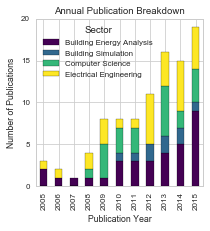

In [66]:
sector_year_group = mergeddata[mergeddata["Publication Year"] != 2016].groupby(['Publication Year','Sector']).count()

fig = plt.figure()
ax = sector_year_group.unstack()['Title'].plot(kind='bar',stacked=True, figsize=(3,3), title="Annual Publication Breakdown", colormap = 'viridis')
ax.set_ylabel("Number of Publications")

plt.savefig("PublicationYear.pdf",bbox_inches='tight')


In [170]:
#mergeddata.head()

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: order is deprecated, use sort_values(...)


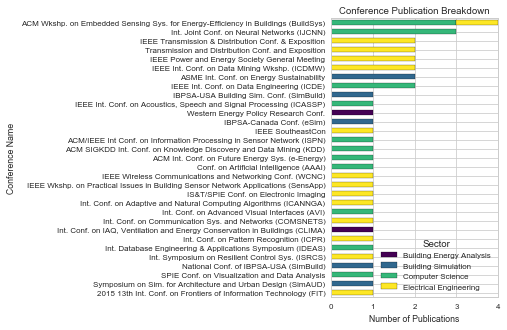

In [171]:
fig = plt.figure()
colors = "viridis"
#sns.set_palette("inferno",4)

stackedbars = mergeddata[(mergeddata["Item Type"] == 'conferencePaper')].groupby(['Conference Name','Sector']).count()
to_plot = stackedbars.unstack()['Title']

plotindex = pd.Series(to_plot.index)
plotindex = plotindex.str.replace("International","Int.")
plotindex = plotindex.str.replace("Conference","Conf.")
plotindex = plotindex.str.replace("Systems","Sys.")
plotindex = plotindex.str.replace("Simulation","Sim.")
plotindex = plotindex.str.replace("Workshop","Wkshp.")
plotindex = plotindex.str.replace("Indoor Air Quality","IAQ")


to_plot.index = plotindex

ax = to_plot.ix[to_plot.sum(axis=1).order().index].plot(kind='barh',stacked=True, figsize=(3,5), title="Conference Publication Breakdown", colormap = colors)
ax.set_xlabel("Number of Publications")
ax.xaxis.set_ticks([0,1,2,3,4])


plt.savefig("ConferencePubs.pdf",bbox_inches='tight');

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


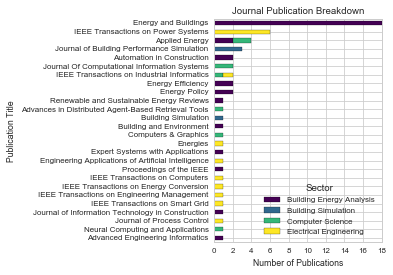

In [172]:
fig = plt.figure()

stackedbars = mergeddata[(mergeddata["Item Type"] == 'journalArticle')].groupby(['Publication Title','Sector']).count()
to_plot = stackedbars.unstack()['Title']
ax = to_plot.ix[to_plot.sum(axis=1).order().index].plot(kind='barh',stacked=True, figsize=(3,4), title="Journal Publication Breakdown", colormap = colors)
ax.set_xlabel("Number of Publications")

plt.savefig("JournalPubs_2.pdf",bbox_inches='tight');

In [173]:
mergeddata.head()

,Title,Publication Title,Conference Name,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific,title,ID
0,A Data Mining Framework for Electricity Consum...,IEEE Transactions on Industrial Informatics,NaN,"De Silva, Daswin; Yu, Xinghuo; Alahakoon, Damm...",journalArticle,2011,Electrical Engineering,SmartMeter,Motif Detection,Incremental Summarization and Pattern Char. (I...,Load Profiling,A Data Mining Framework for Electricity Consum...,de_silva_data_2011
1,A Learning Approach for Energy Efficiency Opti...,Internet of Things. User-Centric IoT,NaN,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",bookSection,2015,Computer Science,Operations,Clustering,K-Means,Occupancy Detection,A Learning Approach for Energy Efficiency Opti...,mansur_learning_2015
2,A Temporal Motif Mining Approach to Unsupervis...,Proceedings of the Twenty-Seventh AAAI Confere...,Conference on Artificial Intelligence (AAAI),"Shao, Huijuan; Marwah, Manish; Ramakrishnan, N...",conferencePaper,2013,Computer Science,SmartMeter,Motif Detection,Dirichlet Process Gaussian Mixture Models (DPGMM),Disaggregation,A Temporal Motif Mining Approach to Unsupervis...,shao_temporal_2013
3,A context-aware method for building occupancy ...,Energy and Buildings,NaN,"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Markov Models,Occupancy Detection,A context-aware method for building occupancy ...,adamopoulou_context-aware_2015
4,A framework for knowledge discovery in massive...,Automation in Construction,NaN,"Fan, Cheng; Xiao, Fu; Yan, Chengchu",journalArticle,2015,Building Energy Analysis,AnomalyDetection,Novelty Detection,Data Assocation Rules (DAR),Whole Building,A framework for knowledge discovery in massive...,fan_framework_2015


In [174]:
current_palette = sns.cubehelix_palette(5, rot=-.75)
sns.set_palette(current_palette)

/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


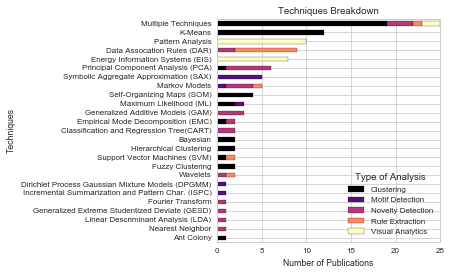

In [175]:
fig = plt.figure()

stackedbars = mergeddata.groupby(['TechniqueTagSpec','TechniqueTagGen']).count()
to_plot = stackedbars.unstack()['Title']
to_plot.columns.name = "Type of Analysis"
ax = to_plot.ix[to_plot.sum(axis=1).order().index].plot(kind='barh',stacked=True, figsize=(4,4), title="Techniques Breakdown", colormap = "magma")
ax.set_xlabel("Number of Publications")
ax.set_ylabel("Techniques")

plt.savefig("Techniques.pdf",bbox_inches='tight');

## create bar charts using a manually tagged data

In [176]:
mergeddata

,Title,Publication Title,Conference Name,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific,title,ID
0,A Data Mining Framework for Electricity Consum...,IEEE Transactions on Industrial Informatics,NaN,"De Silva, Daswin; Yu, Xinghuo; Alahakoon, Damm...",journalArticle,2011,Electrical Engineering,SmartMeter,Motif Detection,Incremental Summarization and Pattern Char. (I...,Load Profiling,A Data Mining Framework for Electricity Consum...,de_silva_data_2011
1,A Learning Approach for Energy Efficiency Opti...,Internet of Things. User-Centric IoT,NaN,"Mansur, Vitor; Carreira, Paulo; Arsenio, Artur",bookSection,2015,Computer Science,Operations,Clustering,K-Means,Occupancy Detection,A Learning Approach for Energy Efficiency Opti...,mansur_learning_2015
2,A Temporal Motif Mining Approach to Unsupervis...,Proceedings of the Twenty-Seventh AAAI Confere...,Conference on Artificial Intelligence (AAAI),"Shao, Huijuan; Marwah, Manish; Ramakrishnan, N...",conferencePaper,2013,Computer Science,SmartMeter,Motif Detection,Dirichlet Process Gaussian Mixture Models (DPGMM),Disaggregation,A Temporal Motif Mining Approach to Unsupervis...,shao_temporal_2013
3,A context-aware method for building occupancy ...,Energy and Buildings,NaN,"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Markov Models,Occupancy Detection,A context-aware method for building occupancy ...,adamopoulou_context-aware_2015
4,A framework for knowledge discovery in massive...,Automation in Construction,NaN,"Fan, Cheng; Xiao, Fu; Yan, Chengchu",journalArticle,2015,Building Energy Analysis,AnomalyDetection,Novelty Detection,Data Assocation Rules (DAR),Whole Building,A framework for knowledge discovery in massive...,fan_framework_2015
5,A method for detecting abnormal electricity en...,Journal Of Computational Information Systems,NaN,"Liu, Dandan; Chen, Qijun; Mori, Kazuyuki; Kida...",journalArticle,2010,Computer Science,AnomalyDetection,Novelty Detection,Classification and Regression Tree(CART),Whole Building,A method for detecting abnormal electricity en...,liu_method_2010
6,A method for detecting abnormal electricity en...,Journal Of Computational Information Systems,NaN,"Liu, Dandan; Chen, Qijun; Mori, Kazuyuki; Kida...",journalArticle,2010,Computer Science,AnomalyDetection,Novelty Detection,Classification and Regression Tree(CART),Classification,A method for detecting abnormal electricity en...,liu_method_2010
7,A model-based fault detection and diagnostic m...,Energy and Buildings,NaN,"Li, Shun; Wen, Jin",journalArticle,2014,Building Energy Analysis,AnomalyDetection,Novelty Detection,Principal Component Analysis (PCA),Subsystem,A model-based fault detection and diagnostic m...,li_model-based_2014
8,A new framework for the analysis of large scal...,NaN,NaN,"Çakmak, Hüseyin Kemâl; Maa\s s, Heiko; Bach, F...",book,2014,Electrical Engineering,SmartMeter,Visual Analytics,Multiple Techniques,Classification,A new framework for the analysis of large scal...,cakmak_new_2014
9,A new framework for the analysis of large scal...,NaN,NaN,"Çakmak, Hüseyin Kemâl; Maa\s s, Heiko; Bach, F...",book,2014,Electrical Engineering,SmartMeter,Visual Analytics,Multiple Techniques,Customer Class.,A new framework for the analysis of large scal...,cakmak_new_2014


In [177]:
mergeddata.to_csv('WholeReferenceList.csv')

Now we go through and label each review with journal name or journal/conference category

In [178]:
mergeddata_labelled = pd.read_csv("WholeReferenceList_PublicationTypeTagged.csv")

In [179]:
mergeddata_labelled

,Unnamed: 0,Title,Publication Title,Conference Name,PublicationType,Author,Item Type,Publication Year,Sector,AppTagGeneral,TechniqueTagGen,TechniqueTagSpec,AppTagSpecific,title,ID
0,16,Analysis of Georeferenced Building Data for th...,Proceedings of the IEEE,NaN,IEEE Transactions (Journal),"Schlueter, A.; Geyer, P.; Cisar, S.",journalArticle,2016,Building Energy Analysis,PortfolioAnalysis,Clustering,Fuzzy Clustering,Targeting,Analysis of Georeferenced Building Data for th...,schlueter_analysis_2016
1,22,Application of clustering for the development ...,Advanced Engineering Informatics,NaN,Other Building Sci. Journal,"Geyer, Philipp; Schl�_ter, Arno; Cisar, Sasha",journalArticle,2016,Building Energy Analysis,PortfolioAnalysis,Clustering,Multiple Techniques,Targeting,Application of clustering for the development ...,geyer_application_2016
2,36,Correlation between occupants and energy consu...,Energy and Buildings,NaN,Energy and Buildings (Journal),"Ahn, Ki-Uhn; Park, Cheol-Soo",journalArticle,2016,Building Energy Analysis,Operations,Rule Extraction,Wavelets,Occupancy Detection,Correlation between occupants and energy consu...,ahn_correlation_2016
3,105,Variability of electricity load patterns and i...,Energy Policy,NaN,Other Elec. Engineering Journal,"Jang, Dongsik; Eom, Jiyong; Jae Park, Min; Jeu...",journalArticle,2016,Building Energy Analysis,SmartMeter,Clustering,K-Means,Classification,Variability of electricity load patterns and i...,jang_variability_2016
4,4,A framework for knowledge discovery in massive...,Automation in Construction,NaN,Automation in Construction (Journal),"Fan, Cheng; Xiao, Fu; Yan, Chengchu",journalArticle,2015,Building Energy Analysis,AnomalyDetection,Novelty Detection,Data Assocation Rules (DAR),Whole Building,A framework for knowledge discovery in massive...,fan\_framework\_2015
5,18,Automated daily pattern filtering of measured ...,Automation in Construction,NaN,Automation in Construction (Journal),"Miller, Clayton; Nagy, Zolt��n; Schlueter, Arno",journalArticle,2015,Building Energy Analysis,PortfolioAnalysis,Motif Detection,Symbolic Aggregate Approximation (SAX),Characterization,Automated daily pattern filtering of measured ...,miller\_automated\_2015
6,3,A context-aware method for building occupancy ...,Energy and Buildings,NaN,Energy and Buildings (Journal),"Adamopoulou, Anna A.; Tryferidis, Athanasios M...",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Markov Models,Occupancy Detection,A context-aware method for building occupancy ...,adamopoulou\_context-aware\_2015
7,52,Identifying energy consumption patterns in the...,Energy and Buildings,NaN,Energy and Buildings (Journal),"Pieri, Stella Panayiota; IoannisTzouvadakis; S...",journalArticle,2015,Building Energy Analysis,PortfolioAnalysis,Clustering,Multiple Techniques,Classifying,NaN,NaN
8,61,Occupancy schedules learning process through a...,Energy and Buildings,NaN,Energy and Buildings (Journal),"D��Oca, Simona; Hong, Tianzhen",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Multiple Techniques,Occupancy Detection,Occupancy schedules learning process through a...,doca\_occupancy\_2015
9,82,Temporal Knowledge Discovery in Big BAS Data f...,Energy and Buildings,NaN,Energy and Buildings (Journal),"Fan, Cheng; Xiao, Fu; Madsen, Henrik; Wang, Dan",journalArticle,2015,Building Energy Analysis,Operations,Rule Extraction,Data Assocation Rules (DAR),Energy Management,Temporal Knowledge Discovery in Big BAS Data f...,fan\_temporal\_2015


In [181]:
mergeddata_labelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 15 columns):
Unnamed: 0           99 non-null int64
Title                99 non-null object
Publication Title    94 non-null object
Conference Name      37 non-null object
PublicationType      99 non-null object
Author               99 non-null object
Item Type            99 non-null object
Publication Year     99 non-null int64
Sector               99 non-null object
AppTagGeneral        99 non-null object
TechniqueTagGen      99 non-null object
TechniqueTagSpec     99 non-null object
AppTagSpecific       99 non-null object
title                91 non-null object
ID                   91 non-null object
dtypes: int64(2), object(13)
memory usage: 12.4+ KB


/Users/Clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


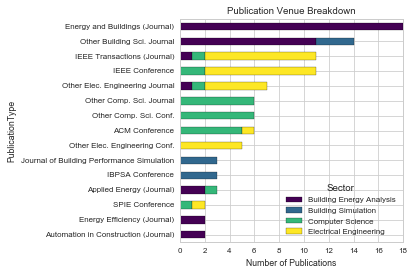

In [183]:
fig = plt.figure()

stackedbars = mergeddata_labelled.groupby(['PublicationType','Sector']).count()
to_plot = stackedbars.unstack()['Title']
ax = to_plot.ix[to_plot.sum(axis=1).order().index].plot(kind='barh',stacked=True, figsize=(4,4), title="Publication Venue Breakdown", colormap = "viridis")
ax.set_xlabel("Number of Publications")

plt.savefig("PublicationVenues.pdf",bbox_inches='tight');